In [57]:
import pandas as pd

In [58]:
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%d-%m %H:%M:%S")
df = pd.read_csv('com-data.csv', parse_dates = True, date_parser = custom_date_parser)
df.drop('Timestamp (Unix)', axis = 1, inplace = True)
df['Timestamp (Day Time(cst))'] = pd.to_datetime(df['Timestamp (Day Time(cst))'])
df.corr()

,Brazil,China,Corn,EU,India,Russia,Soybean,Wheat,Gold
Brazil,1.000000,0.292470,0.277658,-0.107523,-0.027667,0.354006,0.727860,-0.165514,-0.613568
China,0.292470,1.000000,0.135128,-0.039133,0.361277,-0.015375,0.209093,-0.117623,-0.274863
Corn,0.277658,0.135128,1.000000,0.585148,0.409206,0.710470,0.409028,0.747494,0.156548
EU,-0.107523,-0.039133,0.585148,1.000000,0.532474,0.566918,-0.288477,0.850292,0.409850
India,-0.027667,0.361277,0.409206,0.532474,1.000000,0.309386,-0.132234,0.470876,0.230484
Russia,0.354006,-0.015375,0.710470,0.566918,0.309386,1.000000,0.437031,0.620987,-0.216702
Soybean,0.727860,0.209093,0.409028,-0.288477,-0.132234,0.437031,1.000000,-0.094772,-0.626773
Wheat,-0.165514,-0.117623,0.747494,0.850292,0.470876,0.620987,-0.094772,1.000000,0.427795
Gold,-0.613568,-0.274863,0.156548,0.409850,0.230484,-0.216702,-0.626773,0.427795,1.000000


In [59]:
df = df[2400:]

In [60]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from pylab import rcParams
import matplotlib
from matplotlib import pyplot as plt

No handles with labels found to put in legend.


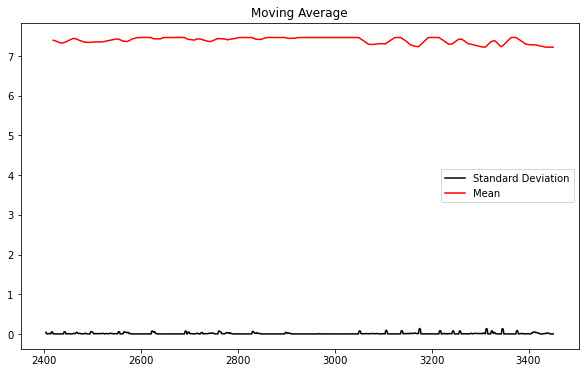

In [62]:
#if not stationary then eliminate trend
#Eliminate trend
df_corn = df['Wheat']
rcParams['figure.figsize'] = 10, 6
df_log = df_corn
moving_avg = df_log.rolling(20).mean()
std_dev = df_log.rolling(5).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [63]:
df_log

2400    7.328222
2401    7.427921
2402    7.427178
2403    7.424506
2404    7.415354
          ...   
3447    7.219598
3448    7.223785
3449    7.223279
3450    7.221763
3451    7.221619
Name: Wheat, Length: 1052, dtype: float64

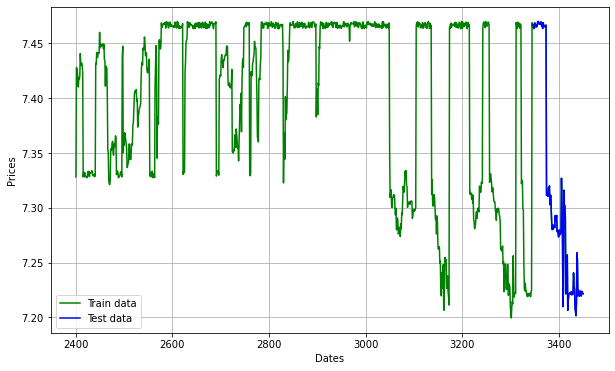

In [64]:
size = round(len(df_log) * .9)
train, test = df_log[0:size], df_log[size:]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6481.335, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-4266.862, Time=0.47 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-4263.156, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-4264.962, Time=0.75 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.49 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.74 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-4298.003, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3050.507, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4300.012, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-2122.759, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-4298.001, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-4292.86

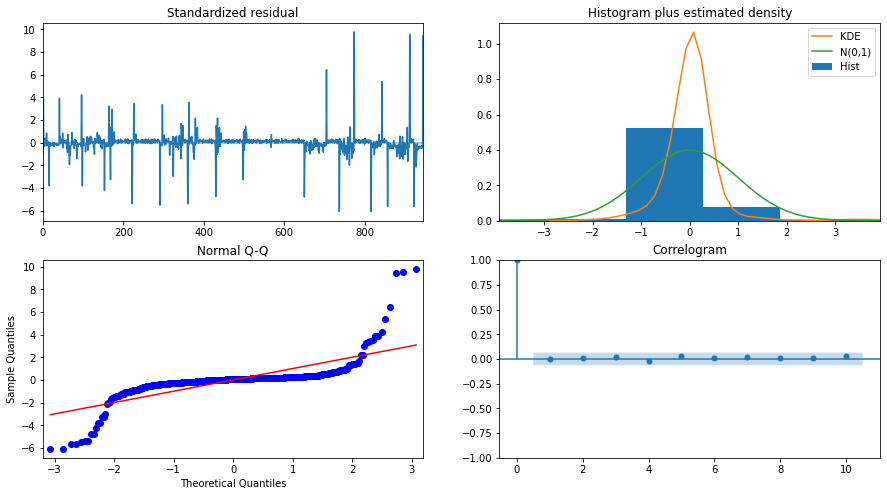

In [65]:
model_autoARIMA = auto_arima(train, start_p=0, start_q=0,test='adf',max_p=3, max_q=3,m=1,d=None,seasonal=False,start_P=0, D=0,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [66]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['Wheat'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.620652
p-value: 0.000118


In [67]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  
print(fitted.summary())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Wheat   No. Observations:                  946
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2150.547
Method:                       css-mle   S.D. of innovations              0.025
Date:                Thu, 17 Feb 2022   AIC                          -4293.093
Time:                        09:41:38   BIC                          -4273.685
Sample:                             1   HQIC                         -4285.697
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.879e-05      0.000     -0.451      0.652      -0.000       0.000
ar.L1.D.Wheat     0.9374      0.015     62.341      0.000       0.908       0.967
ma.L1.D.Wheat    -0.9929      0.006   -1

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


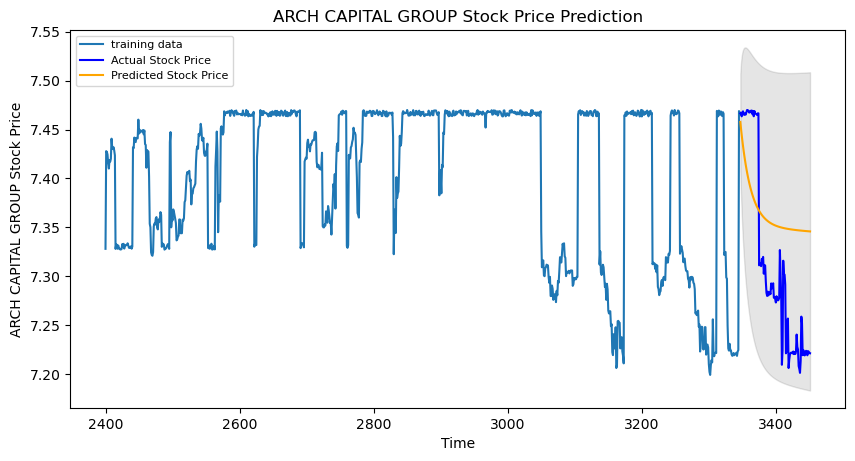

In [72]:
fc, se, conf = fitted.forecast(len(test), alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train, label='training data')
plt.plot(test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

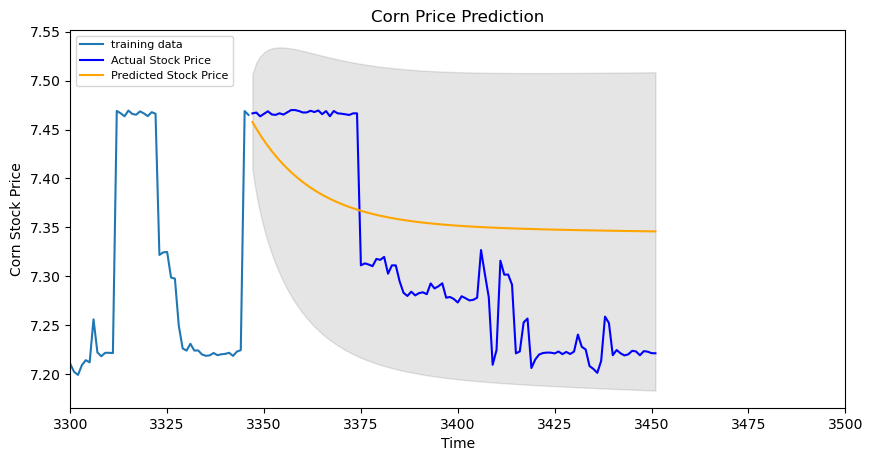

In [56]:
# Forecast
fc, se, conf = fitted.forecast(len(test), alpha=0.05)
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train, label='training data')
plt.plot(test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                  color='k', alpha=.10)
plt.title('Corn Price Prediction')
plt.xlabel('Time')
plt.ylabel('Corn Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.xlim([3300, 3500])
plt.show()

In [35]:
# report performance
mse = mean_squared_error(test, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test)/np.abs(test))
print('MAPE: '+str(mape))

MSE: 0.03128342319226622
MAE: 0.15028145429081985
RMSE: 0.17687120509643797
MAPE: 0.020719075900205778


In [36]:
from joblib import dump, load
dump(fitted, 'wheat_arima.model')

['wheat_arima.model']